# Library

In [222]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import norm, skew, kurtosis, jarque_bera, kstest
from scipy import stats
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
import matplotlib.pyplot as plt

# Data

In [223]:
tickers = ['AAPL', 'AMZN', 'META', 'TSLA', 'TSM', 'IBM', 'BABA', 'EBAY', 'WMT', 'JD', 'ETSY', 'W', 'MELI', 'SE', 'BBY', 'COST', 'LOW', 'TGT', 'CART']

In [224]:
# Mendapatkan data saham TSMC (NYSE: TSM)
stocks_df = yf.download(tickers, start="2023-12-01", end="2024-11-30")['Close']

# Beri nama kolom agar lebih mudah dikenali
# stocks_df.columns = ['AAPL', 'AMZN', 'META', 'TSLA', 'TSM', 'IBM']

stocks_df.index = pd.to_datetime(stocks_df.index)

# Tampilkan DataFrame yang telah digabung
stocks_df

[*********************100%***********************]  19 of 19 completed


Ticker,AAPL,AMZN,BABA,BBY,CART,COST,EBAY,ETSY,IBM,JD,LOW,MELI,META,SE,TGT,TSLA,TSM,W,WMT
Date,,,,,,,,,,,,,,,,,,,
2023-12-01,191.240005,147.029999,73.989998,73.419998,25.370001,596.250000,41.730000,82.040001,160.550003,27.160000,203.919998,1652.010010,324.820007,37.480000,134.779999,238.830002,98.550003,58.529999,51.446667
2023-12-04,189.429993,144.839996,73.029999,74.690002,24.410000,599.080017,41.619999,82.989998,161.100006,26.590000,207.550003,1599.630005,320.019989,38.200001,133.710007,235.580002,97.010002,58.310001,51.433334
2023-12-05,193.419998,146.880005,72.379997,74.000000,23.730000,605.349976,41.480000,81.660004,161.389999,26.120001,205.919998,1584.599976,318.290009,38.000000,132.880005,238.720001,96.690002,55.630001,51.910000
2023-12-06,192.320007,144.520004,71.489998,75.089996,23.510000,607.429993,41.470001,79.540001,160.279999,26.600000,208.699997,1569.250000,317.450012,38.580002,133.380005,239.369995,97.849998,53.070000,51.346668
2023-12-07,194.270004,146.880005,72.330002,74.559998,23.709999,610.950012,41.480000,78.970001,160.220001,26.930000,208.300003,1590.939941,326.589996,39.040001,135.190002,242.639999,99.290001,53.070000,50.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,229.869995,197.119995,83.129997,89.540001,43.220001,964.010010,63.240002,52.299999,222.970001,34.680000,264.679993,2005.000000,559.140015,113.040001,125.010002,352.559998,190.080002,44.029999,90.440002
2024-11-25,232.869995,201.449997,85.580002,93.029999,43.610001,960.890015,64.989998,55.680000,226.130005,34.509998,275.320007,2099.949951,565.109985,114.000000,130.529999,338.589996,185.080002,48.270000,89.500000
2024-11-26,235.059998,207.860001,85.180000,88.480003,43.540001,971.500000,65.089996,54.779999,228.830002,35.330002,274.470001,2110.000000,573.539978,113.930000,126.550003,338.230011,183.839996,45.299999,91.309998


# Log Return

In [225]:
# log_returns =  np.log(stocks_df / stocks_df.shift(1)).dropna()
log_returns =  np.log(stocks_df / stocks_df.shift(1)).dropna()
log_returns

Ticker,AAPL,AMZN,BABA,BBY,CART,COST,EBAY,ETSY,IBM,JD,LOW,MELI,META,SE,TGT,TSLA,TSM,W,WMT
Date,,,,,,,,,,,,,,,,,,,
2023-12-04,-0.009510,-0.015007,-0.013060,0.017150,-0.038575,0.004735,-0.002639,0.011513,0.003420,-0.021210,0.017645,-0.032220,-0.014888,0.019028,-0.007970,-0.013701,-0.015750,-0.003766,-0.000259
2023-12-05,0.020844,0.013986,-0.008940,-0.009281,-0.028253,0.010412,-0.003369,-0.016156,0.001798,-0.017834,-0.007885,-0.009440,-0.005421,-0.005249,-0.006227,0.013241,-0.003304,-0.047051,0.009225
2023-12-06,-0.005703,-0.016198,-0.012372,0.014622,-0.009314,0.003430,-0.000241,-0.026304,-0.006902,0.018210,0.013410,-0.009734,-0.002643,0.015148,0.003756,0.002719,0.011926,-0.047111,-0.010911
2023-12-07,0.010088,0.016198,0.011681,-0.007083,0.008471,0.005778,0.000241,-0.007192,-0.000374,0.012330,-0.001918,0.013727,0.028385,0.011853,0.013479,0.013568,0.014609,0.000000,-0.010310
2023-12-08,0.007385,0.003670,-0.002630,-0.007674,0.030324,-0.000278,-0.004591,0.013958,0.010802,-0.017985,-0.002259,-0.008179,0.018686,0.024293,0.000000,0.004933,0.010619,0.037538,-0.010550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,0.005890,-0.006372,-0.029046,0.034425,-0.000694,0.008710,0.029364,0.005945,0.002560,-0.019984,-0.002038,0.018550,-0.007040,-0.028689,0.027739,0.037335,-0.006084,0.032313,0.022928
2024-11-25,0.012966,0.021729,0.029046,0.038237,0.008983,-0.003242,0.027296,0.062625,0.014073,-0.004914,0.039413,0.046269,0.010620,0.008457,0.043209,-0.040431,-0.026657,0.091939,-0.010448
2024-11-26,0.009360,0.031324,-0.004685,-0.050145,-0.001606,0.010981,0.001537,-0.016296,0.011869,0.023483,-0.003092,0.004774,0.014807,-0.000614,-0.030966,-0.001064,-0.006722,-0.063503,0.020022


In [226]:
log_returns.index = pd.to_datetime(log_returns.index)

In [227]:
# Gabungkan log returns dengan stocks_df_cut
combined_df = pd.concat([stocks_df, log_returns], axis=1)

# Ubah nama kolom agar lebih jelas
combined_df.columns = [f'{col}_Close' if i < len(stocks_df.columns) else f'{col}_LogReturn' 
                       for i, col in enumerate(stocks_df.columns.append(log_returns.columns))]

# Tampilkan DataFrame yang sudah digabung
combined_df

,AAPL_Close,AMZN_Close,BABA_Close,BBY_Close,CART_Close,COST_Close,EBAY_Close,ETSY_Close,IBM_Close,JD_Close,...,JD_LogReturn,LOW_LogReturn,MELI_LogReturn,META_LogReturn,SE_LogReturn,TGT_LogReturn,TSLA_LogReturn,TSM_LogReturn,W_LogReturn,WMT_LogReturn
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-01,191.240005,147.029999,73.989998,73.419998,25.370001,596.250000,41.730000,82.040001,160.550003,27.160000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-04,189.429993,144.839996,73.029999,74.690002,24.410000,599.080017,41.619999,82.989998,161.100006,26.590000,...,-0.021210,0.017645,-0.032220,-0.014888,0.019028,-0.007970,-0.013701,-0.015750,-0.003766,-0.000259
2023-12-05,193.419998,146.880005,72.379997,74.000000,23.730000,605.349976,41.480000,81.660004,161.389999,26.120001,...,-0.017834,-0.007885,-0.009440,-0.005421,-0.005249,-0.006227,0.013241,-0.003304,-0.047051,0.009225
2023-12-06,192.320007,144.520004,71.489998,75.089996,23.510000,607.429993,41.470001,79.540001,160.279999,26.600000,...,0.018210,0.013410,-0.009734,-0.002643,0.015148,0.003756,0.002719,0.011926,-0.047111,-0.010911
2023-12-07,194.270004,146.880005,72.330002,74.559998,23.709999,610.950012,41.480000,78.970001,160.220001,26.930000,...,0.012330,-0.001918,0.013727,0.028385,0.011853,0.013479,0.013568,0.014609,0.000000,-0.010310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,229.869995,197.119995,83.129997,89.540001,43.220001,964.010010,63.240002,52.299999,222.970001,34.680000,...,-0.019984,-0.002038,0.018550,-0.007040,-0.028689,0.027739,0.037335,-0.006084,0.032313,0.022928
2024-11-25,232.869995,201.449997,85.580002,93.029999,43.610001,960.890015,64.989998,55.680000,226.130005,34.509998,...,-0.004914,0.039413,0.046269,0.010620,0.008457,0.043209,-0.040431,-0.026657,0.091939,-0.010448
2024-11-26,235.059998,207.860001,85.180000,88.480003,43.540001,971.500000,65.089996,54.779999,228.830002,35.330002,...,0.023483,-0.003092,0.004774,0.014807,-0.000614,-0.030966,-0.001064,-0.006722,-0.063503,0.020022


In [228]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-12-01 to 2024-11-29
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AAPL_Close      251 non-null    float64
 1   AMZN_Close      251 non-null    float64
 2   BABA_Close      251 non-null    float64
 3   BBY_Close       251 non-null    float64
 4   CART_Close      251 non-null    float64
 5   COST_Close      251 non-null    float64
 6   EBAY_Close      251 non-null    float64
 7   ETSY_Close      251 non-null    float64
 8   IBM_Close       251 non-null    float64
 9   JD_Close        251 non-null    float64
 10  LOW_Close       251 non-null    float64
 11  MELI_Close      251 non-null    float64
 12  META_Close      251 non-null    float64
 13  SE_Close        251 non-null    float64
 14  TGT_Close       251 non-null    float64
 15  TSLA_Close      251 non-null    float64
 16  TSM_Close       251 non-null    float64
 17  W_Close         

In [229]:
# Ekspor DataFrame ke file CSV
combined_df.to_csv('stocks_and_log_returns.csv')

In [230]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def uji_acf_pacf(log_returns, tickers):
    """
    Fungsi untuk melakukan uji ACF dan PACF pada data time series untuk setiap ticker.

    Parameters:
    log_returns (DataFrame): DataFrame yang berisi log returns, dengan setiap ticker sebagai kolom.
    tickers (list): Daftar simbol ticker yang ingin diuji ACF dan PACF-nya.

    Returns:
    None
    """
    for ticker in tickers:
        print(f"Uji ACF untuk {ticker}")
        
        # Plot ACF
        plt.figure(figsize=(10, 6))
        plot_acf(log_returns[ticker], lags=40)
        plt.title(f'ACF untuk {ticker}')
        plt.show()

        print(f"Uji PACF untuk {ticker}")
        
        # Plot PACF
        plt.figure(figsize=(10, 6))
        plot_pacf(log_returns[ticker], lags=40)
        plt.title(f'PACF untuk {ticker}')
        plt.show()

Uji ACF untuk AAPL


<Figure size 1000x600 with 0 Axes>

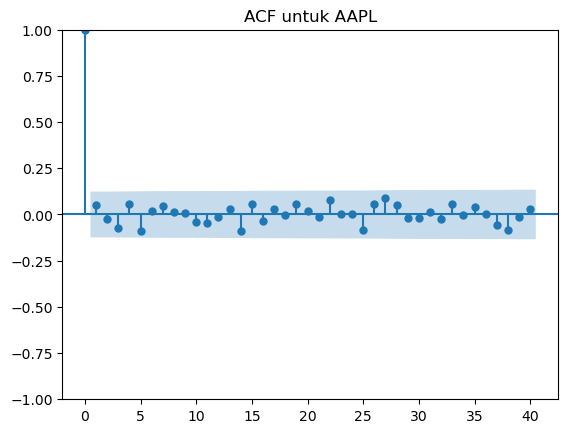

Uji PACF untuk AAPL


<Figure size 1000x600 with 0 Axes>

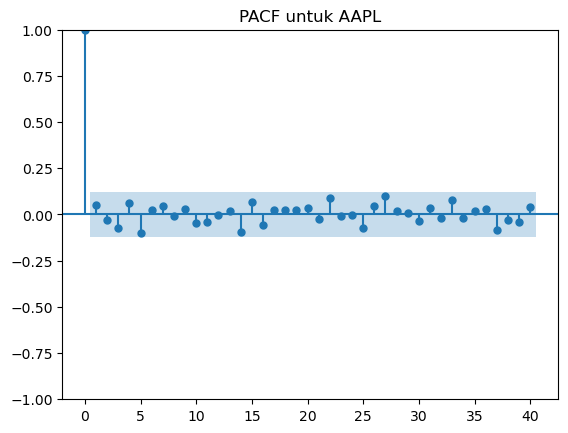

Uji ACF untuk AMZN


<Figure size 1000x600 with 0 Axes>

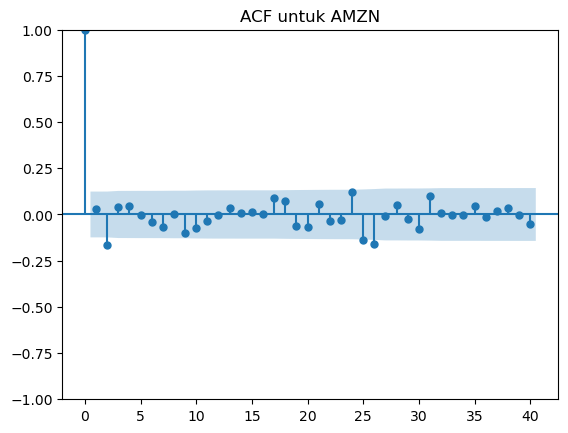

Uji PACF untuk AMZN


<Figure size 1000x600 with 0 Axes>

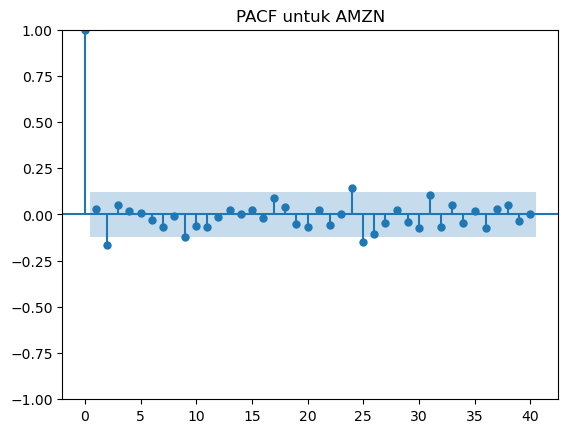

Uji ACF untuk META


<Figure size 1000x600 with 0 Axes>

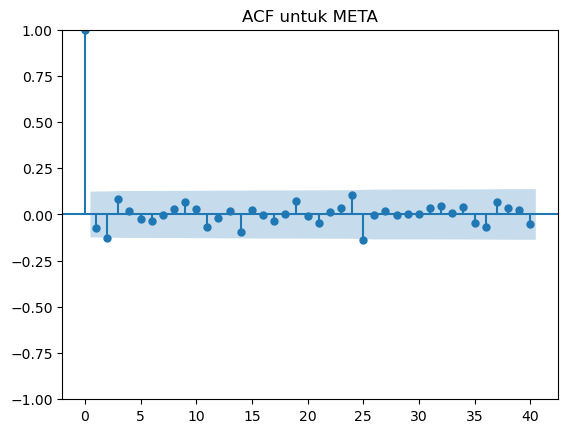

Uji PACF untuk META


<Figure size 1000x600 with 0 Axes>

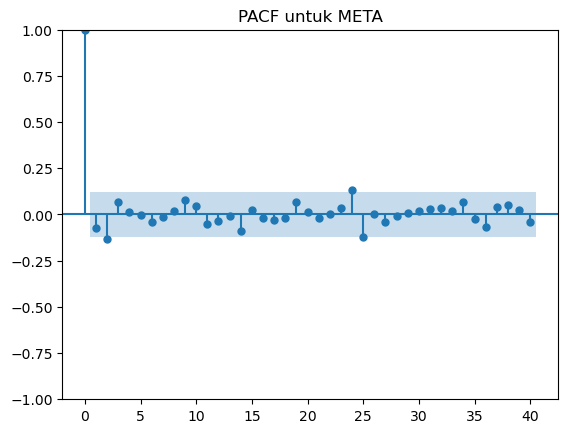

Uji ACF untuk TSLA


<Figure size 1000x600 with 0 Axes>

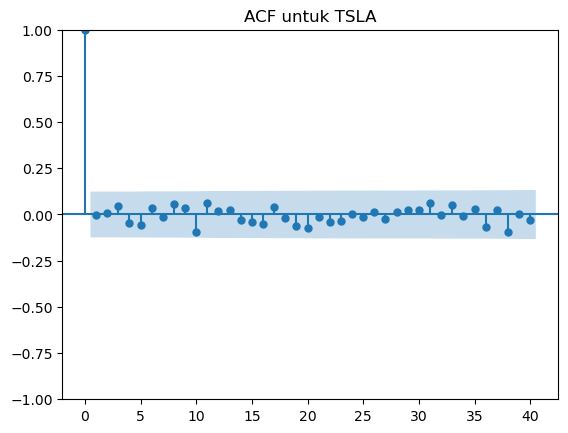

Uji PACF untuk TSLA


<Figure size 1000x600 with 0 Axes>

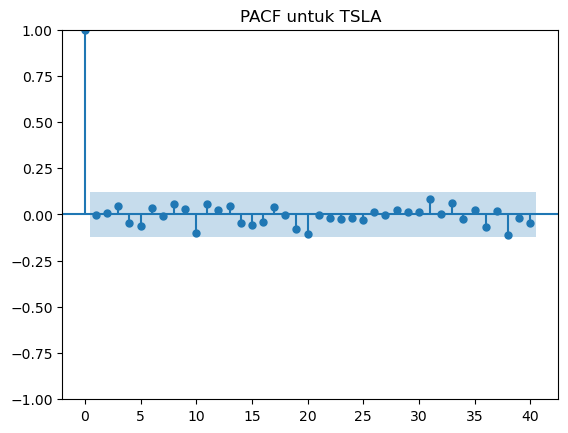

Uji ACF untuk TSM


<Figure size 1000x600 with 0 Axes>

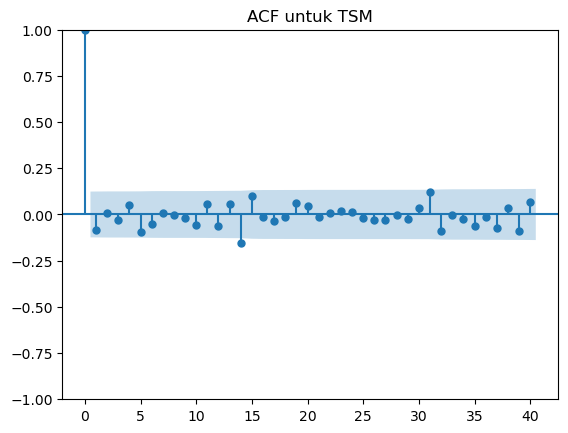

Uji PACF untuk TSM


<Figure size 1000x600 with 0 Axes>

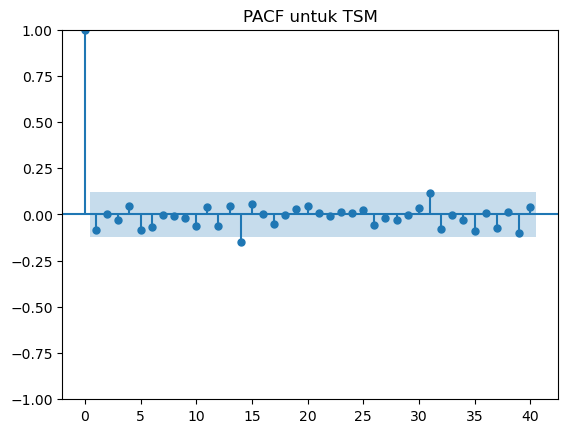

Uji ACF untuk IBM


<Figure size 1000x600 with 0 Axes>

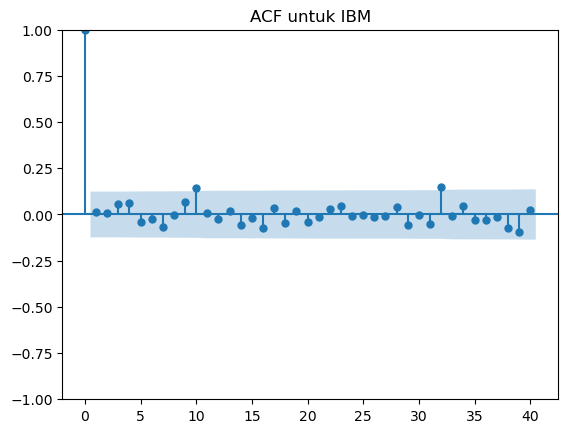

Uji PACF untuk IBM


<Figure size 1000x600 with 0 Axes>

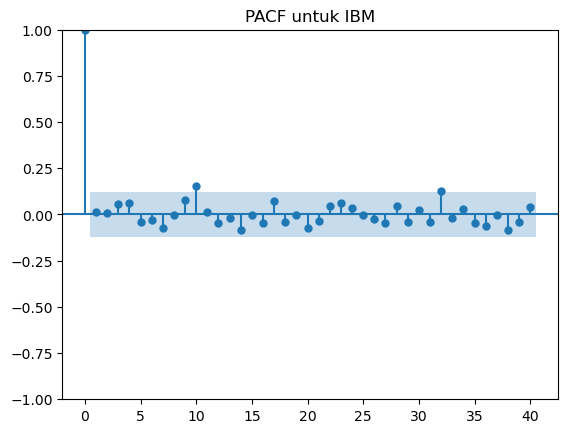

Uji ACF untuk BABA


<Figure size 1000x600 with 0 Axes>

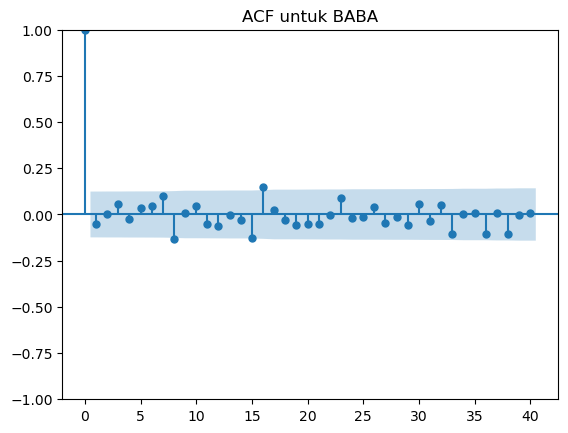

Uji PACF untuk BABA


<Figure size 1000x600 with 0 Axes>

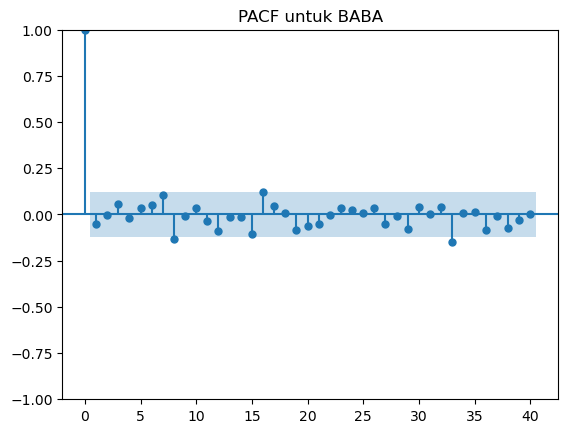

Uji ACF untuk EBAY


<Figure size 1000x600 with 0 Axes>

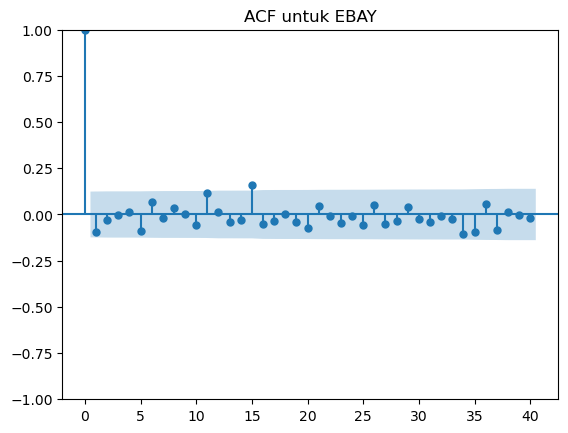

Uji PACF untuk EBAY


<Figure size 1000x600 with 0 Axes>

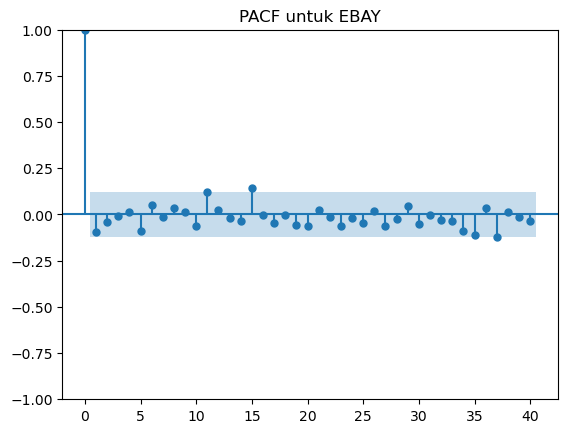

Uji ACF untuk WMT


<Figure size 1000x600 with 0 Axes>

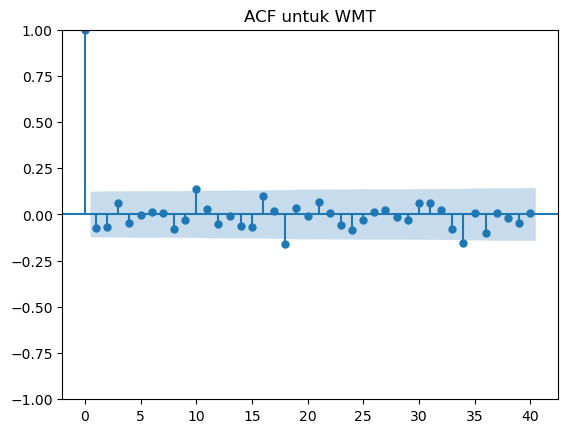

Uji PACF untuk WMT


<Figure size 1000x600 with 0 Axes>

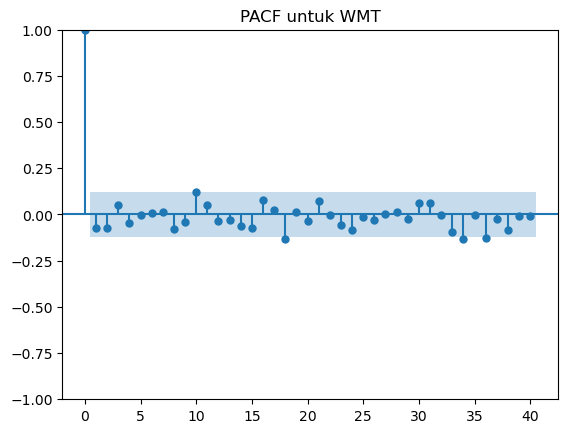

Uji ACF untuk JD


<Figure size 1000x600 with 0 Axes>

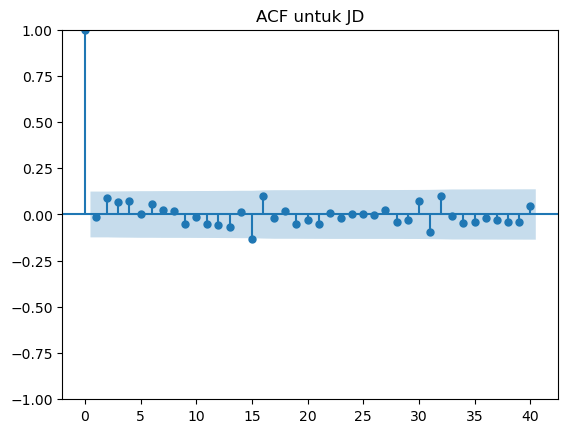

Uji PACF untuk JD


<Figure size 1000x600 with 0 Axes>

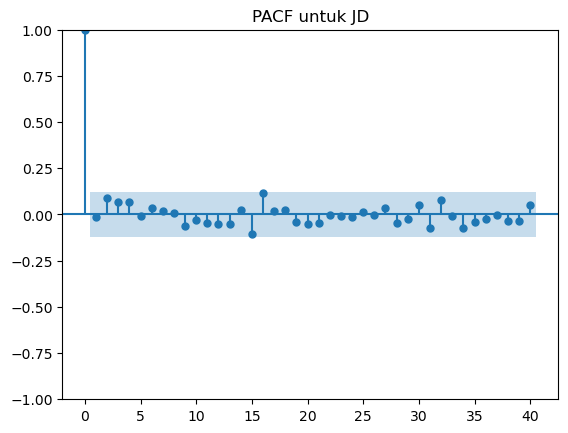

Uji ACF untuk ETSY


<Figure size 1000x600 with 0 Axes>

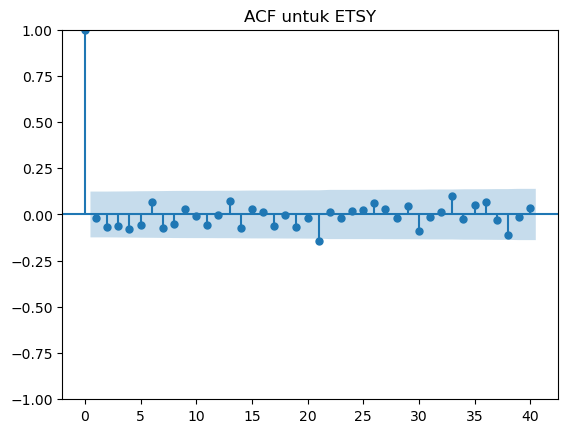

Uji PACF untuk ETSY


<Figure size 1000x600 with 0 Axes>

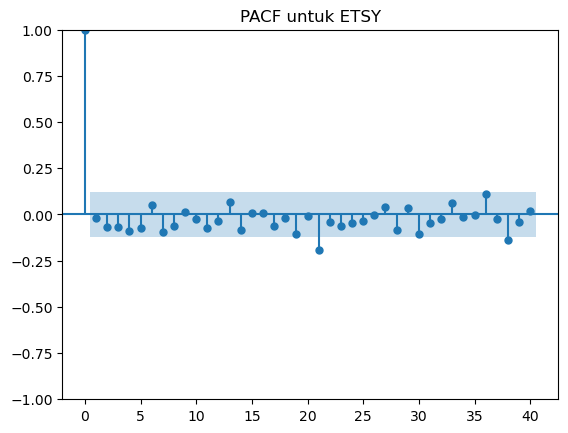

Uji ACF untuk W


<Figure size 1000x600 with 0 Axes>

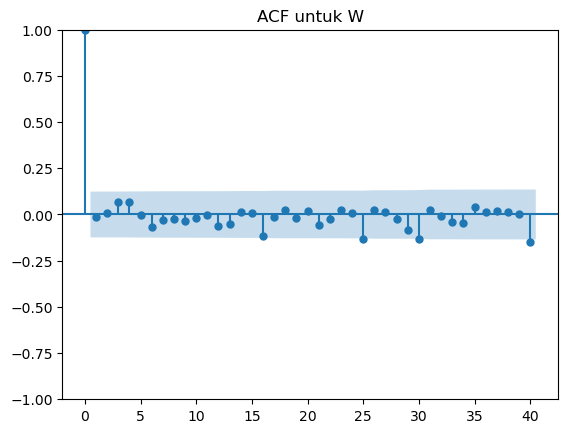

Uji PACF untuk W


<Figure size 1000x600 with 0 Axes>

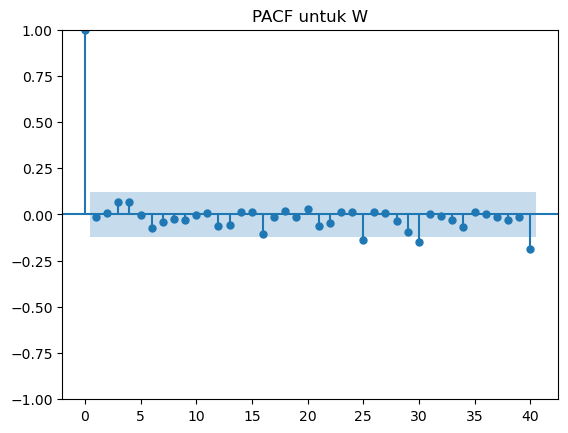

Uji ACF untuk MELI


<Figure size 1000x600 with 0 Axes>

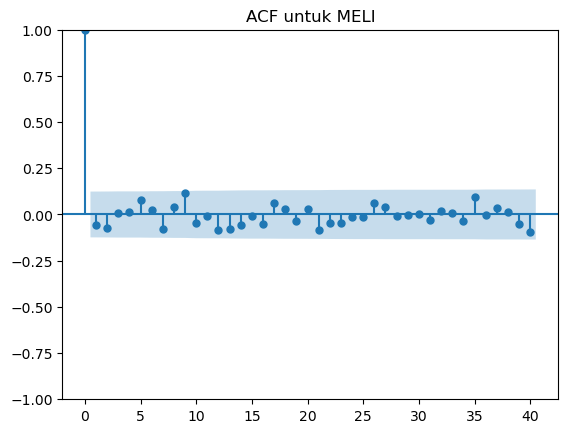

Uji PACF untuk MELI


<Figure size 1000x600 with 0 Axes>

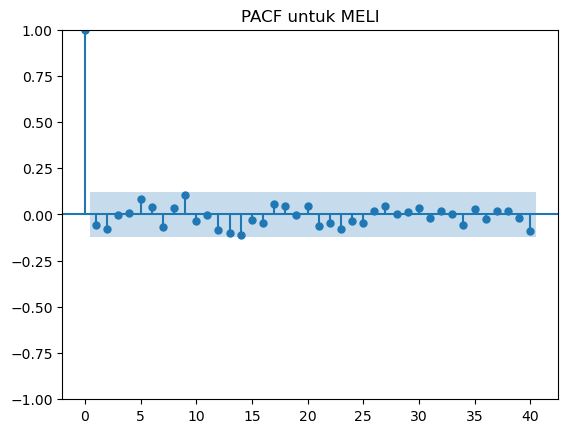

Uji ACF untuk SE


<Figure size 1000x600 with 0 Axes>

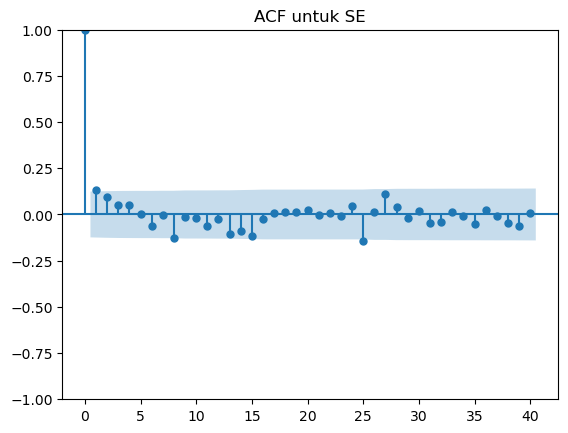

Uji PACF untuk SE


<Figure size 1000x600 with 0 Axes>

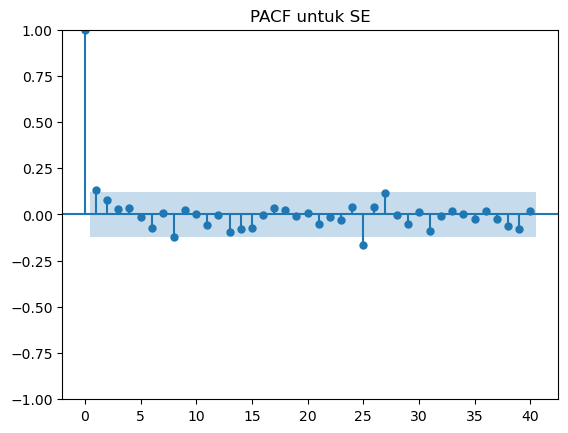

Uji ACF untuk BBY


<Figure size 1000x600 with 0 Axes>

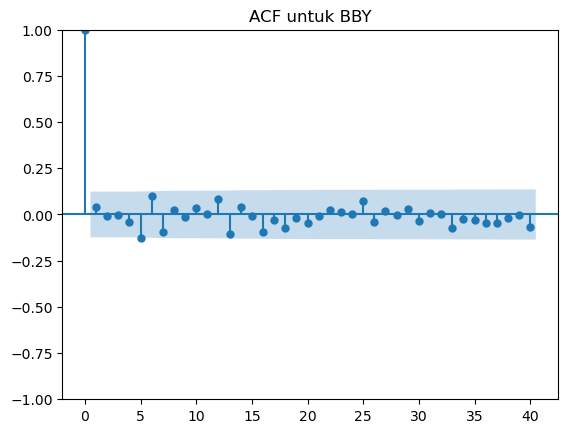

Uji PACF untuk BBY


<Figure size 1000x600 with 0 Axes>

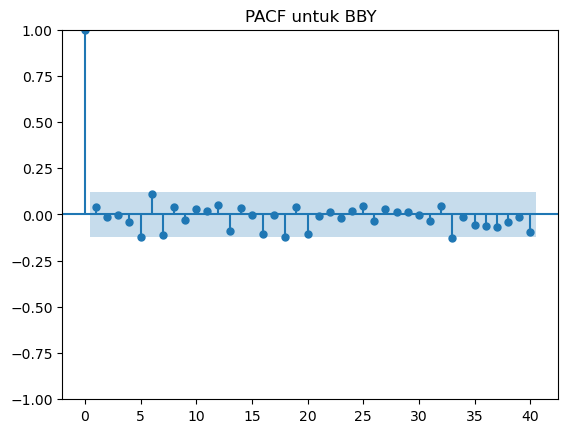

Uji ACF untuk COST


<Figure size 1000x600 with 0 Axes>

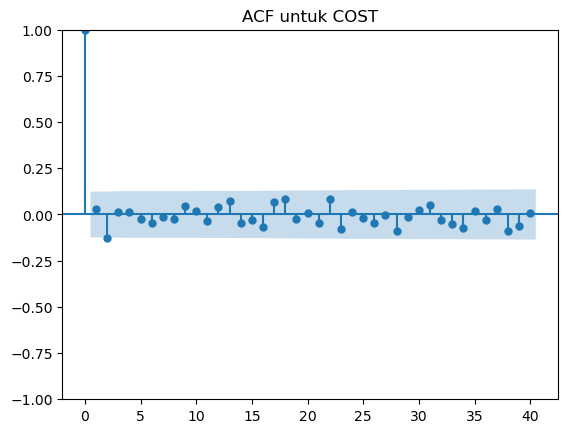

Uji PACF untuk COST


<Figure size 1000x600 with 0 Axes>

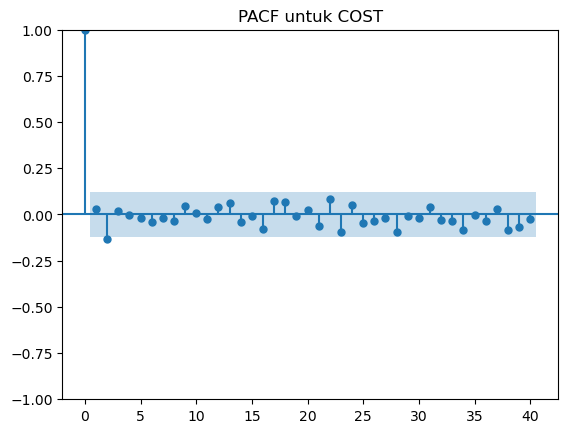

Uji ACF untuk LOW


<Figure size 1000x600 with 0 Axes>

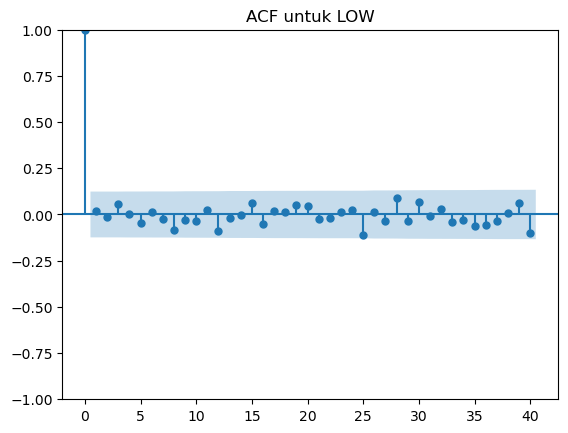

Uji PACF untuk LOW


<Figure size 1000x600 with 0 Axes>

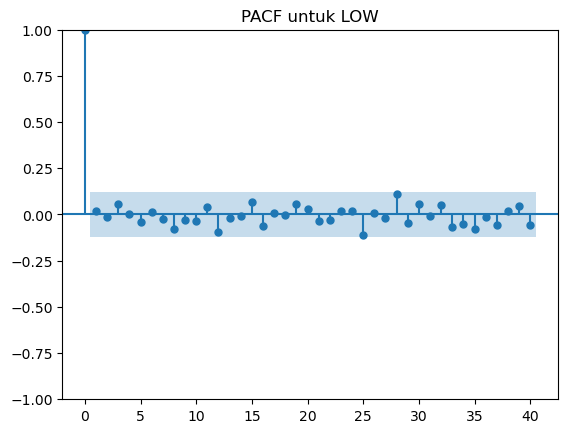

Uji ACF untuk TGT


<Figure size 1000x600 with 0 Axes>

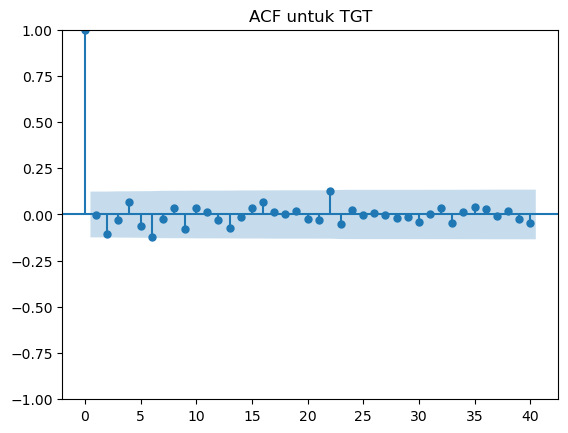

Uji PACF untuk TGT


<Figure size 1000x600 with 0 Axes>

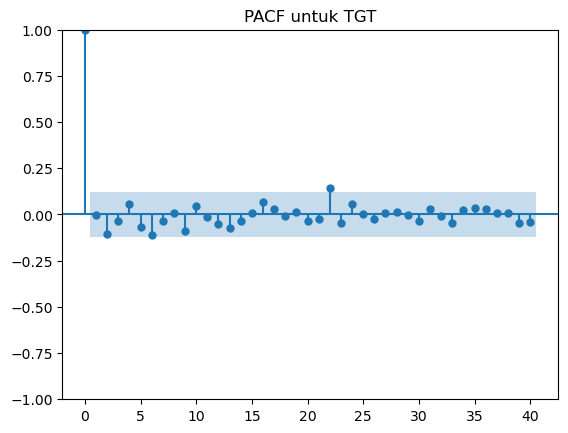

Uji ACF untuk CART


<Figure size 1000x600 with 0 Axes>

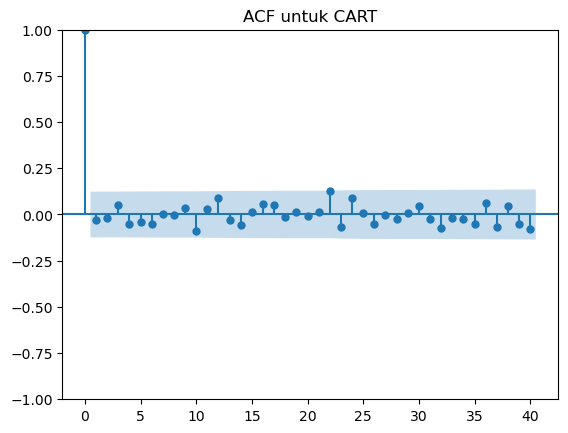

Uji PACF untuk CART


<Figure size 1000x600 with 0 Axes>

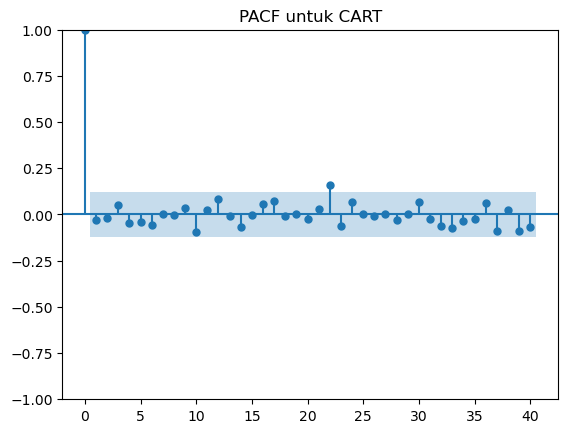

In [231]:
# Panggil fungsi uji ACF dan PACF
uji_acf_pacf(log_returns, tickers)

# Uji Normalitas Return

## Kolmogorov-Smirnov

In [232]:
# Langkah 3: Uji Normalitas (Kolmogorov-Smirnov)
def kolmogorov_smirnov_test(data):
    # Uji Kolmogorov-Smirnov terhadap distribusi normal
    stat, p_value = kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"KS Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print("Data tidak berdistribusi normal")
    else:
        print("Data berdistribusi normal")
    print("")

# Uji normalitas untuk masing-masing saham
for ticker in tickers:
    print(f"Uji Normalitas untuk {ticker}")
    kolmogorov_smirnov_test(log_returns[ticker])


Uji Normalitas untuk AAPL
KS Test Statistic: 0.06842822913606494, p-value: 0.18362847426389817
Data berdistribusi normal

Uji Normalitas untuk AMZN
KS Test Statistic: 0.05523616838260434, p-value: 0.4155923594395181
Data berdistribusi normal

Uji Normalitas untuk META
KS Test Statistic: 0.09610266430777112, p-value: 0.018419638836889393
Data tidak berdistribusi normal

Uji Normalitas untuk TSLA
KS Test Statistic: 0.0785303213361207, p-value: 0.08678202644806865
Data berdistribusi normal

Uji Normalitas untuk TSM
KS Test Statistic: 0.06869541659767908, p-value: 0.18026644182220675
Data berdistribusi normal

Uji Normalitas untuk IBM
KS Test Statistic: 0.0888544167953026, p-value: 0.03625441928696349
Data tidak berdistribusi normal

Uji Normalitas untuk BABA
KS Test Statistic: 0.05549351439258132, p-value: 0.4098001288130556
Data berdistribusi normal

Uji Normalitas untuk EBAY
KS Test Statistic: 0.058817182613026986, p-value: 0.33942137279154283
Data berdistribusi normal

Uji Normalitas u

## Shapiro-Wilk

In [233]:
# Fungsi untuk uji normalitas Shapiro-Wilk
def shapiro_wilk_test(data):
    stat, p_value = stats.shapiro(data)
    print("Shapiro-Wilk Test:")
    print(f"Statistic: {stat}, p-value: {p_value}")
    if p_value > 0.05:
        print("Data mengikuti distribusi normal (p > 0.05).")
    else:
        print("Data tidak mengikuti distribusi normal (p ≤ 0.05).")
    print("")

for ticker in tickers:
    print(f"Uji Normalitas untuk {ticker}")
    shapiro_wilk_test(log_returns[ticker])

Uji Normalitas untuk AAPL
Shapiro-Wilk Test:
Statistic: 0.9581525991793911, p-value: 1.2055024058804733e-06
Data tidak mengikuti distribusi normal (p ≤ 0.05).

Uji Normalitas untuk AMZN
Shapiro-Wilk Test:
Statistic: 0.9593624015429414, p-value: 1.6818545625344084e-06
Data tidak mengikuti distribusi normal (p ≤ 0.05).

Uji Normalitas untuk META
Shapiro-Wilk Test:
Statistic: 0.8374883515654734, p-value: 1.7440736944267994e-15
Data tidak mengikuti distribusi normal (p ≤ 0.05).

Uji Normalitas untuk TSLA
Shapiro-Wilk Test:
Statistic: 0.9407013336320122, p-value: 1.6336812238552717e-08
Data tidak mengikuti distribusi normal (p ≤ 0.05).

Uji Normalitas untuk TSM
Shapiro-Wilk Test:
Statistic: 0.9767738070578906, p-value: 0.0004103377659306081
Data tidak mengikuti distribusi normal (p ≤ 0.05).

Uji Normalitas untuk IBM
Shapiro-Wilk Test:
Statistic: 0.868340637765407, p-value: 7.7819929503987e-14
Data tidak mengikuti distribusi normal (p ≤ 0.05).

Uji Normalitas untuk BABA
Shapiro-Wilk Test:
St

## Jarque-Bera

In [234]:
# Langkah 3: Uji Normalitas (Jarque-Bera)
def jarque_bera_test(data):
    stat, p_value = jarque_bera(data)
    print(f"JB Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print("Data tidak berdistribusi normal")
    else:
        print("Data berdistribusi normal")
    print("")

# Uji normalitas untuk masing-masing saham
for ticker in tickers:
    print(f"Uji Normalitas untuk {ticker}")
    jarque_bera_test(log_returns[ticker])


Uji Normalitas untuk AAPL
JB Test Statistic: 122.23955803743026, p-value: 2.8577039625908915e-27
Data tidak berdistribusi normal

Uji Normalitas untuk AMZN
JB Test Statistic: 174.95357380796247, p-value: 1.0216782617014645e-38
Data tidak berdistribusi normal

Uji Normalitas untuk META
JB Test Statistic: 4027.2447716734405, p-value: 0.0
Data tidak berdistribusi normal

Uji Normalitas untuk TSLA
JB Test Statistic: 205.93577553321083, p-value: 1.912557627186149e-45
Data tidak berdistribusi normal

Uji Normalitas untuk TSM
JB Test Statistic: 31.733395037418614, p-value: 1.285821909606062e-07
Data tidak berdistribusi normal

Uji Normalitas untuk IBM
JB Test Statistic: 1453.028552360038, p-value: 0.0
Data tidak berdistribusi normal

Uji Normalitas untuk BABA
JB Test Statistic: 45.599293875261644, p-value: 1.253831411157659e-10
Data tidak berdistribusi normal

Uji Normalitas untuk EBAY
JB Test Statistic: 289.8987330052823, p-value: 1.1201855665289711e-63
Data tidak berdistribusi normal

Uji N

# Cornish-Fisher Expansion

In [235]:
# Langkah 1: Hitung log returns
# log_returns = np.log(stocks_df['AAPL'] / stocks_df['AAPL'].shift(1)).dropna()

# Langkah 2: Hitung skewness dan kurtosis untuk setiap saham
skewness = log_returns.apply(skew)
kurt = log_returns.apply(kurtosis)

# Langkah 3: Tentukan level kepercayaan (misalnya, 99%)
alpha = 0.05
t = 1

z_normal = norm.ppf(1 - alpha)  # Quantile untuk distribusi normal

# Langkah 4: Cornish-Fisher Expansion untuk perbaikan kuantil
def cornish_fisher(z_normal, skewness, kurt):
    """
    Menggunakan Cornish-Fisher Expansion untuk memperbaiki quantile distribusi normal.
    """
    z_cornish_fisher = z_normal + (1 / 6) * (z_normal**2 - 1) * skewness + \
                       (1 / 24) * (z_normal**3 - 3 * z_normal) * kurt - \
                       (1 / 36) * (2 * z_normal**3 - 5 * z_normal) * skewness**2
    return z_cornish_fisher

# Langkah 5: Hitung VaR untuk setiap saham
var_normal = {}
var_cornish_fisher = {}

for ticker in tickers:
    # Ambil log returns untuk ticker tersebut
    returns = log_returns[ticker]
    
    # Hitung standar deviasi log returns
    std_dev = returns.std()
    
    # Hitung VaR dengan distribusi normal
    var_normal[ticker] = -z_normal * std_dev * np.sqrt(t)
    
    # Hitung VaR dengan Cornish-Fisher Expansion
    z_cornish_fisher_val = cornish_fisher(z_normal, skewness[ticker], kurt[ticker])
    var_cornish_fisher[ticker] = -z_cornish_fisher_val * std_dev * np.sqrt(t)

# Tampilkan hasil VaR
var_df = pd.DataFrame({
    'VaR_Normal': var_normal,
    'VaR_Cornish_Fisher': var_cornish_fisher
})

var_df

,VaR_Normal,VaR_Cornish_Fisher
AAPL,-0.023362,-0.023949
AMZN,-0.028577,-0.026111
META,-0.036700,-0.036752
TSLA,-0.062712,-0.066404
TSM,-0.040698,-0.041624
IBM,-0.023577,-0.019534
BABA,-0.038161,-0.039649
EBAY,-0.025701,-0.022292
WMT,-0.017760,-0.020141
JD,-0.054911,-0.060446


In [236]:
# Modal Awal
V0 = 10000  # Modal awal yang diinvestasikan

In [237]:
# Langkah 7: Hitung VaR dalam nilai uang
var_df['VaR Normal (USD)'] = V0 * (var_df['VaR_Normal'])
var_df['VaR Cornish-Fisher (USD)'] = V0 * (var_df['VaR_Cornish_Fisher'])
var_df

,VaR_Normal,VaR_Cornish_Fisher,VaR Normal (USD),VaR Cornish-Fisher (USD)
AAPL,-0.023362,-0.023949,-233.621174,-239.493383
AMZN,-0.028577,-0.026111,-285.771807,-261.107992
META,-0.036700,-0.036752,-366.997038,-367.520849
TSLA,-0.062712,-0.066404,-627.121543,-664.037536
TSM,-0.040698,-0.041624,-406.980608,-416.243912
IBM,-0.023577,-0.019534,-235.774346,-195.343164
BABA,-0.038161,-0.039649,-381.605823,-396.489577
EBAY,-0.025701,-0.022292,-257.007941,-222.917941
WMT,-0.017760,-0.020141,-177.595282,-201.410030
JD,-0.054911,-0.060446,-549.111425,-604.460460


# ARCH

In [239]:
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd

# Fungsi untuk membangun dan menyesuaikan model AR
def ar_model(data):
    # Membangun model AR dengan menggunakan lags tertentu (misalnya, p=1 untuk AR(1))
    model = AutoReg(data, lags=1)
    model_fit = model.fit()
    print(model_fit.summary())  # Menampilkan ringkasan hasil model
    print("")
    return model_fit

# Modelkan AR untuk setiap ticker
for ticker in tickers:
    print("==============================================================================")
    print(f"=========================== Model AR untuk {ticker} ============================")
    print("==============================================================================")
    
    # Modelkan AR untuk data log returns masing-masing saham
    result = ar_model(log_returns[ticker])

    # Output hasil estimasi model AR
    print(result.summary())

    # Langkah berikutnya bisa dilakukan sesuai dengan analisis residual atau prediksi
    residuals = result.resid  # Mendapatkan residual dari model AR
    arch_test = het_arch(residuals)
    print(f"\nARCH LM Test p-value: {arch_test[1]}\n")

    # Jika p-value < 0.05, maka ada bukti adanya heteroskedastisitas pada residuals
    if arch_test[1] < 0.05:
        print("Terdapat heteroskedastisitas pada residuals.")
    else:
        print("Tidak terdapat heteroskedastisitas pada residuals.")
    print("\n")

=========================== Model AR untuk AAPL ============================
                            AutoReg Model Results                             
Dep. Variable:                   AAPL   No. Observations:                  250
Model:                     AutoReg(1)   Log Likelihood                 706.602
Method:               Conditional MLE   S.D. of innovations              0.014
Date:                Sat, 07 Dec 2024   AIC                          -1407.205
Time:                        12:10:35   BIC                          -1396.652
Sample:                             1   HQIC                         -1402.957
                                  250                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      0.959      0.337      -0.001       0.003
AAPL.L1        0.0516      0.063      0.815      0.415

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

In [238]:
# Langkah 4: Model ARCH/GARCH
# Memodelkan ARCH (GARCH) untuk masing-masing saham
def arch_garch_model(data):
    model = arch_model(data, vol='ARCH', p=1, rescale=False)
    model_fit = model.fit(disp="off")
    print(model_fit.summary())
    print("")
    return model_fit

# Modelkan ARCH/GARCH untuk setiap saham
for ticker in tickers:
    print("==============================================================================")
    print(f"=========================== Model ARCH untuk {ticker} ============================")
    print("==============================================================================")
    result = arch_garch_model(log_returns[ticker])

    # Output hasil estimasi model ARCH
    print(result.summary())

    # Langkah 4: Mengambil Residuals dari Model
    residuals = result.resid

    # Langkah 5: Uji Heteroskedastisitas dengan ARCH LM Test
    # Uji heteroskedastisitas (ARCH LM Test) pada residuals
    arch_test = het_arch(residuals)
    print(f"\nARCH LM Test p-value: {arch_test[1]}\n")

    # Jika p-value < 0.05, maka ada bukti adanya heteroskedastisitas pada residuals
    if arch_test[1] < 0.05:
        print("Terdapat heteroskedastisitas pada residuals.")
    else:
        print("Tidak terdapat heteroskedastisitas pada residuals.")
    print("\n")



=========================== Model ARCH untuk AAPL ============================
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                712.787
Distribution:                  Normal   AIC:                          -1419.57
Method:            Maximum Likelihood   BIC:                          -1409.01
                                        No. Observations:                  250
Date:                Sat, Dec 07 2024   Df Residuals:                      249
Time:                        11:51:23   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------